In [280]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [281]:
# Given a CSV data file as represented by the sample file EuCitiesTemperatures.csv (213 records), 
# load it into a Pandas DataFrame and perform the following tasks on it.

cityTemps_file = open("EuCitiesTemperatures.csv")
citytemps = pd.read_csv(cityTemps_file)
citytemps[citytemps['city'] == 'Brest']

,city,country,population,EU,coastline,latitude,longitude,temperature
10,Brest,Belarus,9.48,no,no,52.10,23.7,6.73
40,Brest,France,64.67,yes,yes,48.39,-4.5,11.02


In [282]:
def getCountryLocationAvg(country_in,coord_in):
    
    filter_country = citytemps.groupby('country')[coord_in].mean().loc[country_in]
    
    return round(filter_country,2)

In [283]:
def get_average_temp(country_in):
    
    temp_df = citytemps[citytemps['country'] == country_in]
    
    EU = temp_df['EU'].iloc[0]
    Coast_line = temp_df['coastline'].iloc[0]
    
    average_value = citytemps[(citytemps['EU'] == EU) & (citytemps['coastline'] == Coast_line)]['temperature'].mean()
    
    return round(average_value,2)

In [284]:
# Question 1 - Fill in the missing latitude and longitude values by calculating the average for that country. Round the average to 2 decimal places.

# Question 3 - Fill in the missing temperature values by the average temperature value of the similar region type.

# A region type would be a combinaton of whether it is in EU (yes/no) and whether it has a coastline (yes/no).
# For example, if we have a missing temperature value for Bergen, Norway, which is not in the EU but lies on the coast, 
# we will fill it with the average temperature of cities with EU='no' and coastline='yes')


df1 = citytemps.copy()

lat_column = []
long_column = []
temp_column = []

for id, row in df1.iterrows():
    if np.isnan(row['latitude']):
        lat_column.append(getCountryLocationAvg(row[1],'latitude'))
    else:
        lat_column.append(row['latitude'])
    if np.isnan(row['longitude']):
        long_column.append(getCountryLocationAvg(row[1],'longitude'))
    else:
        long_column.append(row['longitude'])
    if np.isnan(row['temperature']):
        temp_column.append(get_average_temp(row[1]))
    else:
        temp_column.append(row['temperature'])
        
        
df1['latitude'] = lat_column
df1['longitude'] = long_column
df1['temperature'] = temp_column

In [285]:
df1[df1['city'] == 'Brest']

,city,country,population,EU,coastline,latitude,longitude,temperature
10,Brest,Belarus,9.48,no,no,52.10,23.7,6.73
40,Brest,France,64.67,yes,yes,48.39,-4.5,11.02


In [286]:
# Question 2 - Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). 
# Find out which countries have the maximum number of cities in this geographical band. (More than one country could have the maximum number of values.)

new_df1 = df1[(df1['latitude'] >=40) & (df1['latitude'] <=60) & (df1['longitude'] >=15) & (df1['longitude'] <=30)]
Country_most_cities = new_df1.groupby('country')['city'].count().sort_values(ascending=False)

i=0
while Country_most_cities[i] == Country_most_cities[0]:
    print(Country_most_cities.index[i])
    print(new_df1[new_df1['country'] == Country_most_cities.index[i]]['city'].tolist())
    i+=1

Romania
['Botosani', 'Braila', 'Bucharest', 'Craiova', 'Sibiu', 'Arad', 'Bacau', 'Baia Mare', 'Constanta']
Poland
['Bialystok', 'Bydgoszcz', 'Bytom', 'Elblag', 'Kielce', 'Koszalin', 'Poznan', 'Wroclaw', 'Warsaw']


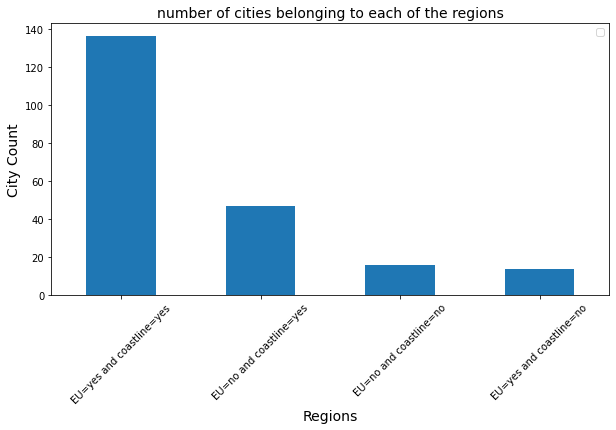

In [287]:
#Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above

region_cities = pd.DataFrame(columns=['city','region'])

for id,row in df1[['city','EU','coastline']].iterrows():
    region_cities = region_cities.append({'city': row[0], 'region':f'EU={row[1]} and coastline={row[2]}'},ignore_index=True)

axis = region_cities['region'].value_counts().plot(figsize=(10,5),kind='bar',rot=45)
axis.set_ylabel('City Count',fontsize=14)
axis.set_xlabel('Regions',fontsize=14)
axis.set_title('number of cities belonging to each of the regions',fontsize=14)
axis.legend('')
plt.show()

In [288]:
print(df1[df1['city'] == 'Brest'])
region_cities[region_cities['city'] == 'Brest']

     city  country  population   EU coastline  latitude  longitude  \
10  Brest  Belarus        9.48   no        no     52.10       23.7   
40  Brest   France       64.67  yes       yes     48.39       -4.5   

    temperature  
10         6.73  
40        11.02  


,city,region
10,Brest,EU=no and coastline=no
40,Brest,EU=yes and coastline=yes


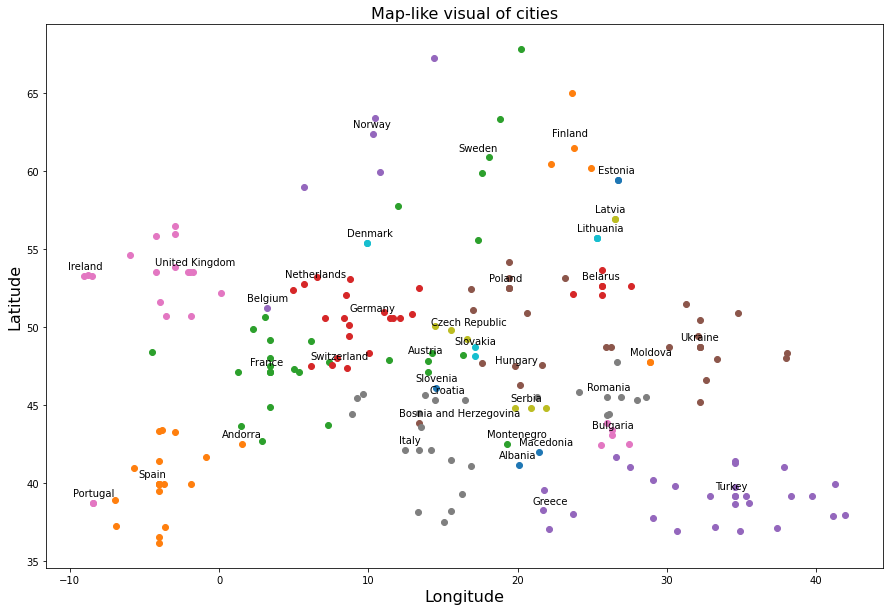

In [289]:
#Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. 
#All the cities in the same country should have the same color

groups = df1.groupby('country')
plt.figure(figsize=(15, 10))

for name, group in groups:
    y = group['latitude'].values
    x = group['longitude'].values
    plt.scatter(x, y, label=name, alpha=1)
    plt.annotate(name, xy=(x.mean(),y.mean()), 
        xytext=(-20,7),textcoords='offset points')

plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)
plt.title('Map-like visual of cities',fontsize=16)
plt.show()

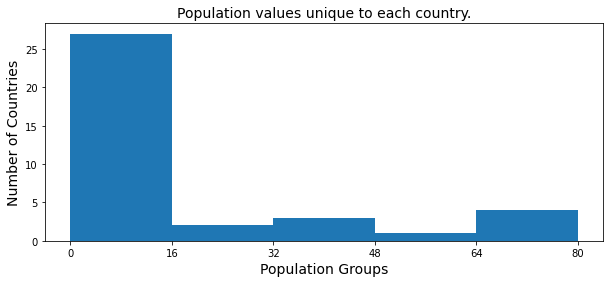

In [290]:
#The population column contains values unique to each country. So two cities of the same country will show the same population value.
#Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups).

population = np.array(df1['population'].unique()).astype(int)

plt.figure(figsize=(10, 4))
plt.hist(population,bins=5)
plt.xticks(range(0,population.max()+1,round(population.max()/5)))
plt.ylabel('Number of Countries', fontsize=14)
plt.xlabel('Population Groups', fontsize=14)
plt.title('Population values unique to each country.', fontsize=14)
plt.show()

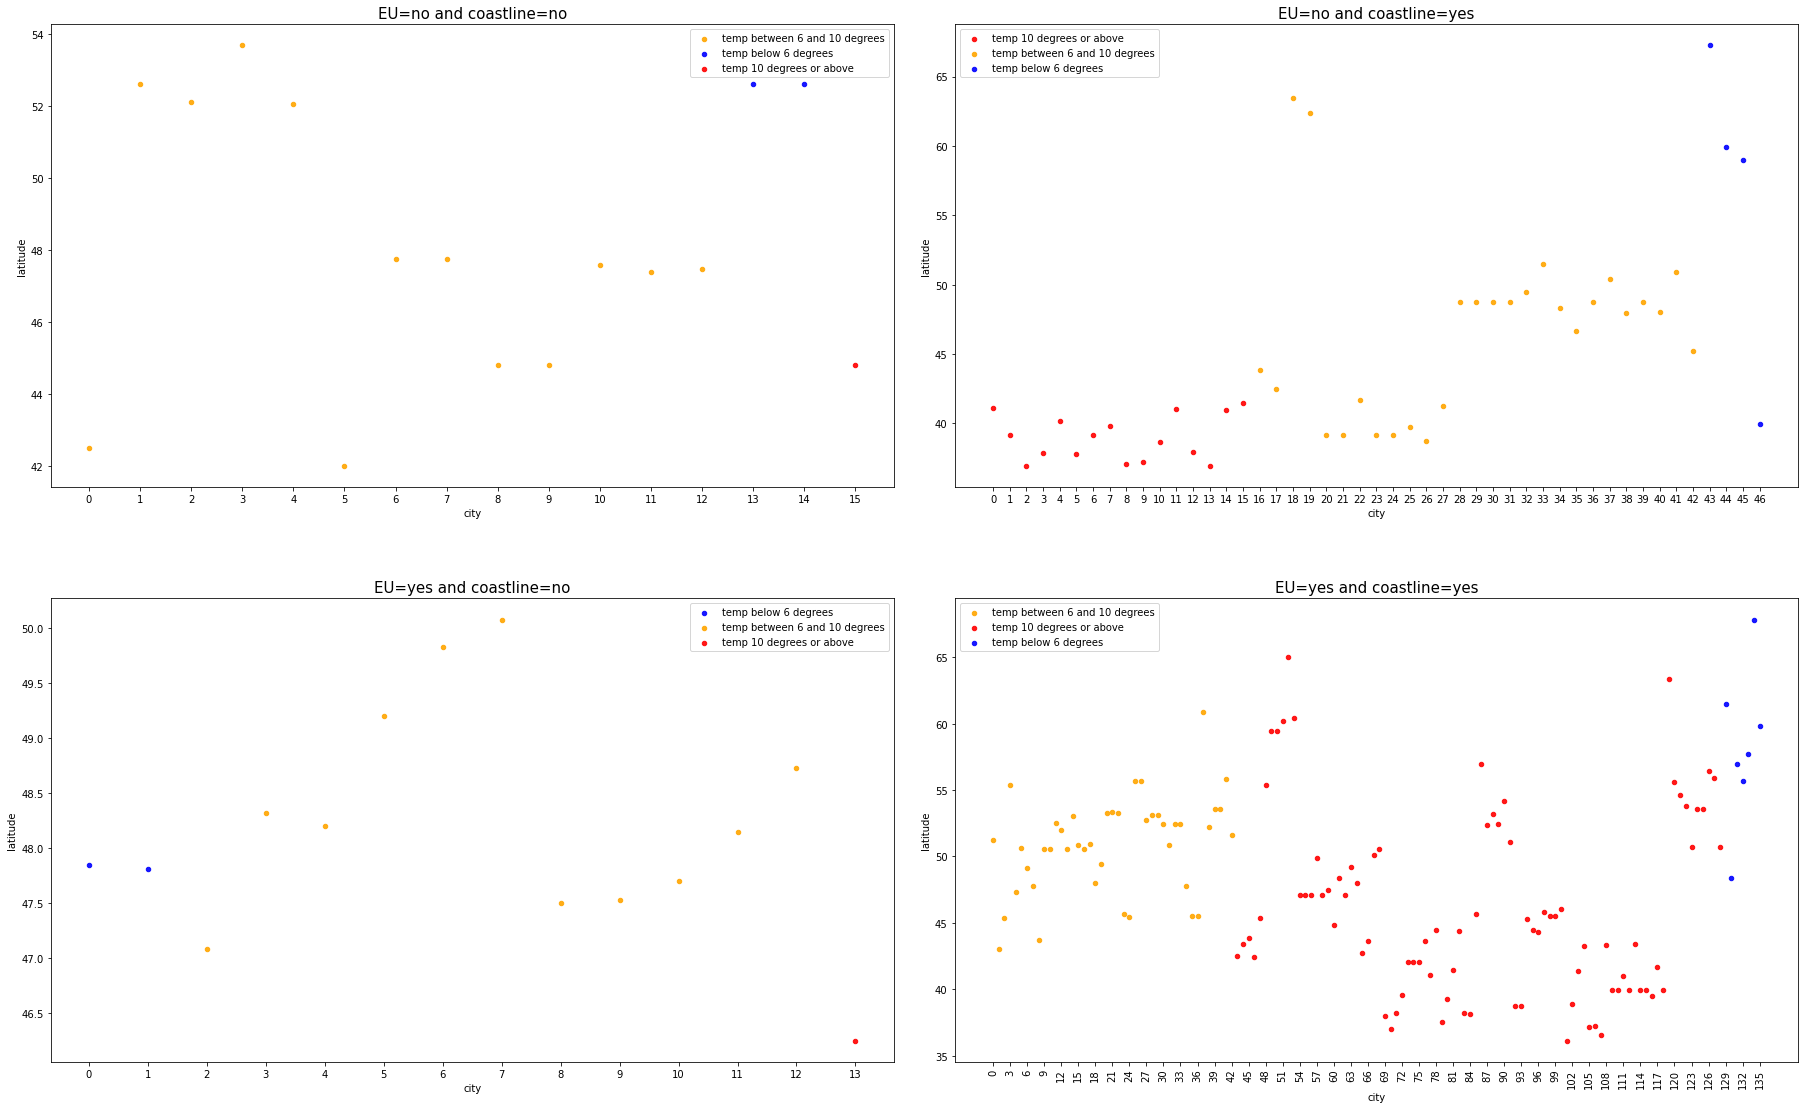

In [349]:
#Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above.
#Each subplot should be a scatter plot of Latitude (y-axis) vs. City (x-axis), where the color of the plot points should be based on the temperature values: ‘red’ for temperatures above 10, ‘blue’ for temperatures below 6 and ‘orange for temperatures between 6 and 10 (both inclusive). 
#For each subplot, set xticks to an array of numbers from 0 to n-1 (both inclusive), where n is the total number of cities in each region type. 
#This represents each city as a number between 0 and n-1.


def temp_color(temp_in):
    
    if temp_in > 10.0:
        color = 'red'
    elif temp_in < 6.0:
        color = 'blue'
    else:
        color = 'orange'
    return color

result = pd.concat([region_cities,df1[['latitude','longitude','temperature']]], axis=1)
result['color'] = np.array(df1['temperature'].apply(temp_color))


fig, axes = plt.subplots(2,2,figsize=(25,15))
fig.tight_layout(h_pad=9.0,w_pad=3.0)

switch = {0:'no',1:'yes'}
         
for i in (0,1):
    for j in (0,1):
        param_str = f'EU={switch.get(i)} and coastline={switch.get(j)}'
        df_temp = result[result['region'] == param_str]
        colors = df_temp['color'].unique()
        
        for color in colors:
            if color == 'red':
                legend_label = 'temp 10 degrees or above'
            if color == 'orange':
                legend_label = 'temp between 6 and 10 degrees'
            if color == 'blue':
                legend_label = 'temp below 6 degrees'
            df_temp[df_temp['color'] == color].plot('city','latitude',ax=axes[i][j], kind='scatter',color= color, alpha=0.9,label=legend_label)
            axes[i][j].set_title(param_str, fontsize=15)
            
            if i==1 and j==1:
                axes[i][j].set_xticks(np.arange(0, len(df_temp['city'])+1,3))
                axes[i][j].set_xticklabels(np.arange(0, len(df_temp['city'])+1,3),rotation=90)
            else:
                axes[i][j].set_xticks(np.arange(0, len(df_temp['city'])))
                axes[i][j].set_xticklabels(np.arange(0, len(df_temp['city'])))
                legend_label = 'temp 10 degrees or above'
                axes[i][j].legend()
        
    